In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [23]:
lumis = pd.read_json('mqLumisUpdate.json', orient = 'split', compression = 'infer')
lumis

,run,file,lumis,fill,beam,beamInRun,dir,filename,start,stop,beamType,beamEnergy,betaStar,fillStart,fillEnd,startStableBeam,endStableBeam,lumiEst
0,1000,2,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.2_default.root,1685641394000,1685641422000,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.307054
1,1000,3,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.3_default.root,1685641422000,1685641446000,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.263189
2,1000,4,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.4_default.root,1685641448000,1685641472000,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.263189
3,1000,5,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.5_default.root,1685641473000,1685641497000,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.263189
4,1000,6,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1000.6_default.root,1685641497000,1685641522000,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.274155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65040,1580,61,0,None,False,False,/store/user/milliqan/run3/bar//1500/0008,MilliQan_Run1580.61_default.root,1715207597000,1715208009000,None,None,None,None,None,None,None,0.000000
65041,1580,6,395.064863,9608,True,True,/store/user/milliqan/run3/bar//1500/0008,MilliQan_Run1580.6_default.root,1715184105000,1715184551000,PROTONS,6799.32,120.0,1715141655000,1715192396000,1715146633000,1715166743000,8.761757
65042,1580,7,395.064863,9608,True,True,/store/user/milliqan/run3/bar//1500/0008,MilliQan_Run1580.7_default.root,1715184551000,1715184964000,PROTONS,6799.32,120.0,1715141655000,1715192396000,1715146633000,1715166743000,8.113465
65043,1580,8,395.064863,9608,True,True,/store/user/milliqan/run3/bar//1500/0008,MilliQan_Run1580.8_default.root,1715184964000,1715185384000,PROTONS,6799.32,120.0,1715141655000,1715192396000,1715146633000,1715166743000,8.250982


In [61]:
def plotLumis(lumis, x=0.4, y=0.7):
    #filter out negative lumis for now
    lumis = lumis[lumis['lumiEst'] >= 0]

    #convert end times to datetimes
    lumis['stop'] = pd.to_datetime(lumis['stop'], unit='ms')

    #make sure values are in chronological order
    lumis = lumis.sort_values(by='stop')

    #get cumulative sum of lumi
    lumis['lumiSum'] = lumis['lumiEst'].cumsum()

    #convert pb to fb
    lumis['lumiSum'] = lumis['lumiSum'] / 1000

    plt.figure(figsize=(10, 6))  # width, height in inches

    plt.plot(lumis['stop'], lumis['lumiSum'])
    plt.title('Recorded Luminosity by MilliQan Bar Detector', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Recorded Luminosity (pb^-1)', fontsize=16)

    plt.fill_between(lumis['stop'], lumis['lumiSum'], color='lightblue', alpha=0.3)


    totalLumi = round(lumis.iloc[-1]['lumiSum'], 2)
    textStr = 'Total Luminosity Recorded: {}'.format(totalLumi)

    plt.text(x, y, textStr+' $fb^{-1}$', fontsize=16, color='red', ha='center', va='center', transform=plt.gca().transAxes)

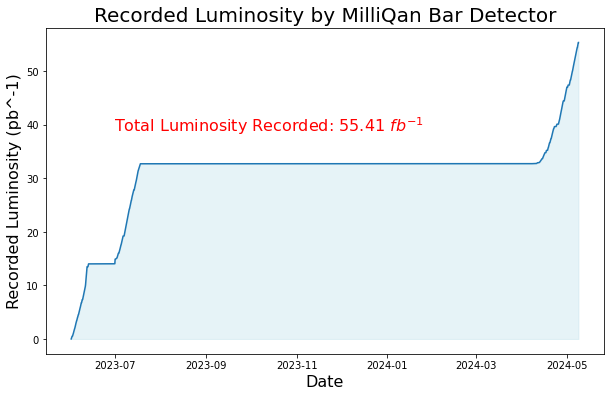

In [62]:
plotLumis(lumis)

In [56]:
goodRuns = pd.read_json('../configuration/barConfigs/goodRunsList.json', orient = 'split', compression = 'infer')

#select only goodRunTight
goodRuns = goodRuns[goodRuns['goodRunTight']==True]

In [57]:
#get entries that are in goodRuns and lumis

selected_rows = lumis[lumis['run'].isin(goodRuns['run']) & lumis['file'].isin(goodRuns['file'])]
selected_rows

,run,file,lumis,fill,beam,beamInRun,dir,filename,start,stop,beamType,beamEnergy,betaStar,fillStart,fillEnd,startStableBeam,endStableBeam,lumiEst,lumiSum
27,1004,1,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1004.1_default.root,1685644266000,2023-06-01 18:32:53,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,1.173384,0.010089
28,1004,2,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1004.2_default.root,1685644374000,2023-06-01 18:33:38,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.482513,0.010571
29,1005,1,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1005.1_default.root,1685644464000,2023-06-01 18:34:54,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.328986,0.010900
30,1005,2,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1005.2_default.root,1685644496000,2023-06-01 18:35:20,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.263189,0.011164
31,1005,3,235.872058,8858,True,True,/store/user/milliqan/run3/bar//1000/0000,MilliQan_Run1005.3_default.root,1685644523000,2023-06-01 18:35:46,PROTONS,6799.56,120.0,1685617938000,1685646657000,1685624820000,1685646329000,0.252223,0.011416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56924,1499,162,None,9432,False,True,/store/user/milliqan/run3/bar//1400/0009,MilliQan_Run1499.162_default.root,1711524688000,2024-03-27 07:39:54,PROTONS,None,None,1711517706000,1711543992000,None,None,0.000000,32.741163
56925,1499,163,None,9432,False,True,/store/user/milliqan/run3/bar//1400/0009,MilliQan_Run1499.163_default.root,1711525194000,2024-03-27 07:48:19,PROTONS,None,None,1711517706000,1711543992000,None,None,0.000000,32.741163
56926,1499,164,None,9432,False,True,/store/user/milliqan/run3/bar//1400/0009,MilliQan_Run1499.164_default.root,1711525700000,2024-03-27 07:56:34,PROTONS,None,None,1711517706000,1711543992000,None,None,0.000000,32.741163
56927,1499,165,None,9432,False,True,/store/user/milliqan/run3/bar//1400/0009,MilliQan_Run1499.165_default.root,1711526195000,2024-03-27 08:04:39,PROTONS,None,None,1711517706000,1711543992000,None,None,0.000000,32.741163


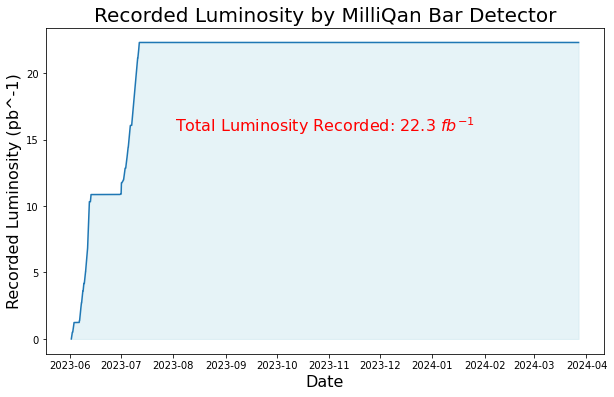

In [64]:
plotLumis(selected_rows, x=0.5)